In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = np.load("images/ct_volume.npy")
seg = np.load('images/rtstruct_labels.npy')

print(img.shape, seg.shape)

(953, 512, 512) (953, 512, 512)


In [9]:
np.unique(seg)

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 12, 13, 14, 15, 16, 17, 19, 20,
       21, 22, 23, 25, 27, 28, 29, 30], dtype=int16)

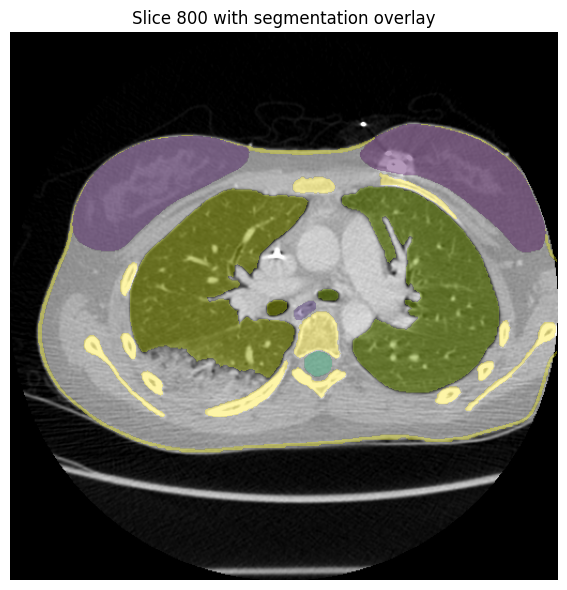

In [3]:
# slice_idx = img.shape[0] // 2  # middle slice, change as you like
slice_idx = 800

ct_slice = img[slice_idx]      # (512, 512)
seg_slice = seg[slice_idx]     # (512, 512)

# Optional: nice contrast using percentiles
vmin, vmax = np.percentile(ct_slice, (1, 99))

# Create a masked version of seg so 0 = transparent
seg_masked = np.ma.masked_where(seg_slice == 0, seg_slice)

plt.figure(figsize=(6, 6))
plt.imshow(ct_slice, cmap="gray", vmin=vmin, vmax=vmax)
plt.imshow(seg_masked, alpha=0.4)  # alpha controls transparency
plt.axis("off")
plt.title(f"Slice {slice_idx} with segmentation overlay")
plt.tight_layout()
plt.show()